In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

import sys
import os
# Current working directory in Jupyter Notebook
project_root = os.getcwd()  # Current working directory
project_root = os.path.join(project_root, '..')  # Move one level up to the root
sys.path.append(project_root)
# from importlib import reload
# import utils.custom
# reload(utils.custom)
from utils.custom import calculate_metrics, plot_returns
from definitions.constants import  DATE_GS_CUTOFF
from definitions.constants_V import SINGLE_RUN_STOCK_DICT_PKL_V, SINGLE_RUN_RETURNS_PKL_V

with open(SINGLE_RUN_RETURNS_PKL_V, 'rb') as f:
    returns = pickle.load(f)


In [2]:
with open(SINGLE_RUN_STOCK_DICT_PKL_V, 'rb') as f:
    dictt = pickle.load(f)

dictt

{'2006-01-31': array([], dtype=float64),
 '2006-02-28': array([], dtype=float64),
 '2006-03-31': array(['EBAY', 'AAPL', 'YHOO'], dtype=object),
 '2006-04-28': array(['AAPL', 'YHOO', 'C'], dtype=object),
 '2006-05-31': array([], dtype=float64),
 '2006-06-30': array(['EBAY', 'AAPL', 'INTC'], dtype=object),
 '2006-07-31': array(['AAPL', 'MSFT', 'PFE'], dtype=object),
 '2006-08-31': array(['CSCO', 'EBAY', 'INTC'], dtype=object),
 '2006-09-29': array(['EBAY', 'AAPL', 'TLT'], dtype=object),
 '2006-10-31': array(['EBAY', 'AAPL', 'MSFT'], dtype=object),
 '2006-11-30': array([], dtype=float64),
 '2006-12-29': array([], dtype=float64),
 '2007-01-31': array([], dtype=float64),
 '2007-02-28': array([], dtype=float64),
 '2007-03-30': array([], dtype=float64),
 '2007-04-30': array(['MSFT', 'GE', 'GOOG'], dtype=object),
 '2007-05-31': array([], dtype=float64),
 '2007-06-29': array([], dtype=float64),
 '2007-07-31': array([], dtype=float64),
 '2007-08-31': array([], dtype=float64),
 '2007-09-28': arra

In [3]:
# dictt
filtered_keys = {k: v for k, v in dictt.items() if k > DATE_GS_CUTOFF}
filtered_keys

{'2018-01-31': array(['NVDA', 'TSLA', 'GOOGL'], dtype=object),
 '2018-02-28': array([], dtype=float64),
 '2018-03-29': array(['UCO', 'MSFT', 'AAPL'], dtype=object),
 '2018-04-30': array(['FB', 'UCO', 'MSFT'], dtype=object),
 '2018-05-31': array(['FB', 'AAPL', 'TLT'], dtype=object),
 '2018-06-29': array([], dtype=float64),
 '2018-07-31': array([], dtype=float64),
 '2018-08-31': array([], dtype=float64),
 '2018-09-28': array(['UCO', 'NVDA', 'BAC'], dtype=object),
 '2018-10-31': array([], dtype=float64),
 '2018-11-30': array([], dtype=float64),
 '2018-12-31': array(['TSLA', 'AMZN', 'AAPL'], dtype=object),
 '2019-01-31': array(['FB', 'UCO', 'NFLX'], dtype=object),
 '2019-02-28': array(['FB', 'AAPL', 'BABA'], dtype=object),
 '2019-03-29': array(['NVDA', 'AAPL', 'VNQ'], dtype=object),
 '2019-04-30': array([], dtype=float64),
 '2019-05-31': array([], dtype=float64),
 '2019-06-28': array(['NVDA', 'TSLA', 'NFLX'], dtype=object),
 '2019-07-31': array(['GOOGL', 'BABA', 'IWM'], dtype=object),
 '20

In [4]:
xiv_count = 0

# Iterate through the dictionary values
for date, tickers in dictt.items():
    if 'XIV' in tickers:
        xiv_count += 1

print(f"The stock ticker 'XIV' appears {xiv_count} times in the dictionary.")

The stock ticker 'XIV' appears 0 times in the dictionary.


/tmp/ipykernel_41035/4187050076.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'XIV' in tickers:


In [5]:
returns[returns.index > '2018-01-01'].head(10)

2018-01-31    -0.482617
2018-02-28     0.000000
2018-03-29     7.223661
2018-04-30     6.558561
2018-05-31    -0.357037
2018-06-29     0.000000
2018-07-31     0.000000
2018-08-31     0.000000
2018-09-28   -19.726140
2018-10-31     0.000000
dtype: float64

In [6]:
annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=returns)#[(returns.index>'2009-01-01')]
# Print results
print(f"Annual Return: {annual_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
print(f"Calmar Ratio: {calmar_ratio:.2f}") 
print(f"Sortino Ratio: {sortino_ratio:.2f}")

Annual Return: 9.70%
Sharpe Ratio: 0.46
Max Drawdown: 46.05%
Calmar Ratio: 0.21
Sortino Ratio: 0.67


In [7]:
annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=returns[(returns.index<=DATE_GS_CUTOFF)])#&(returns.index>'2009-01-01')

# Print results
print(f"Annual Return: {annual_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

Annual Return: 5.34%
Sharpe Ratio: 0.32
Max Drawdown: 38.48%
Calmar Ratio: 0.14
Sortino Ratio: 0.49


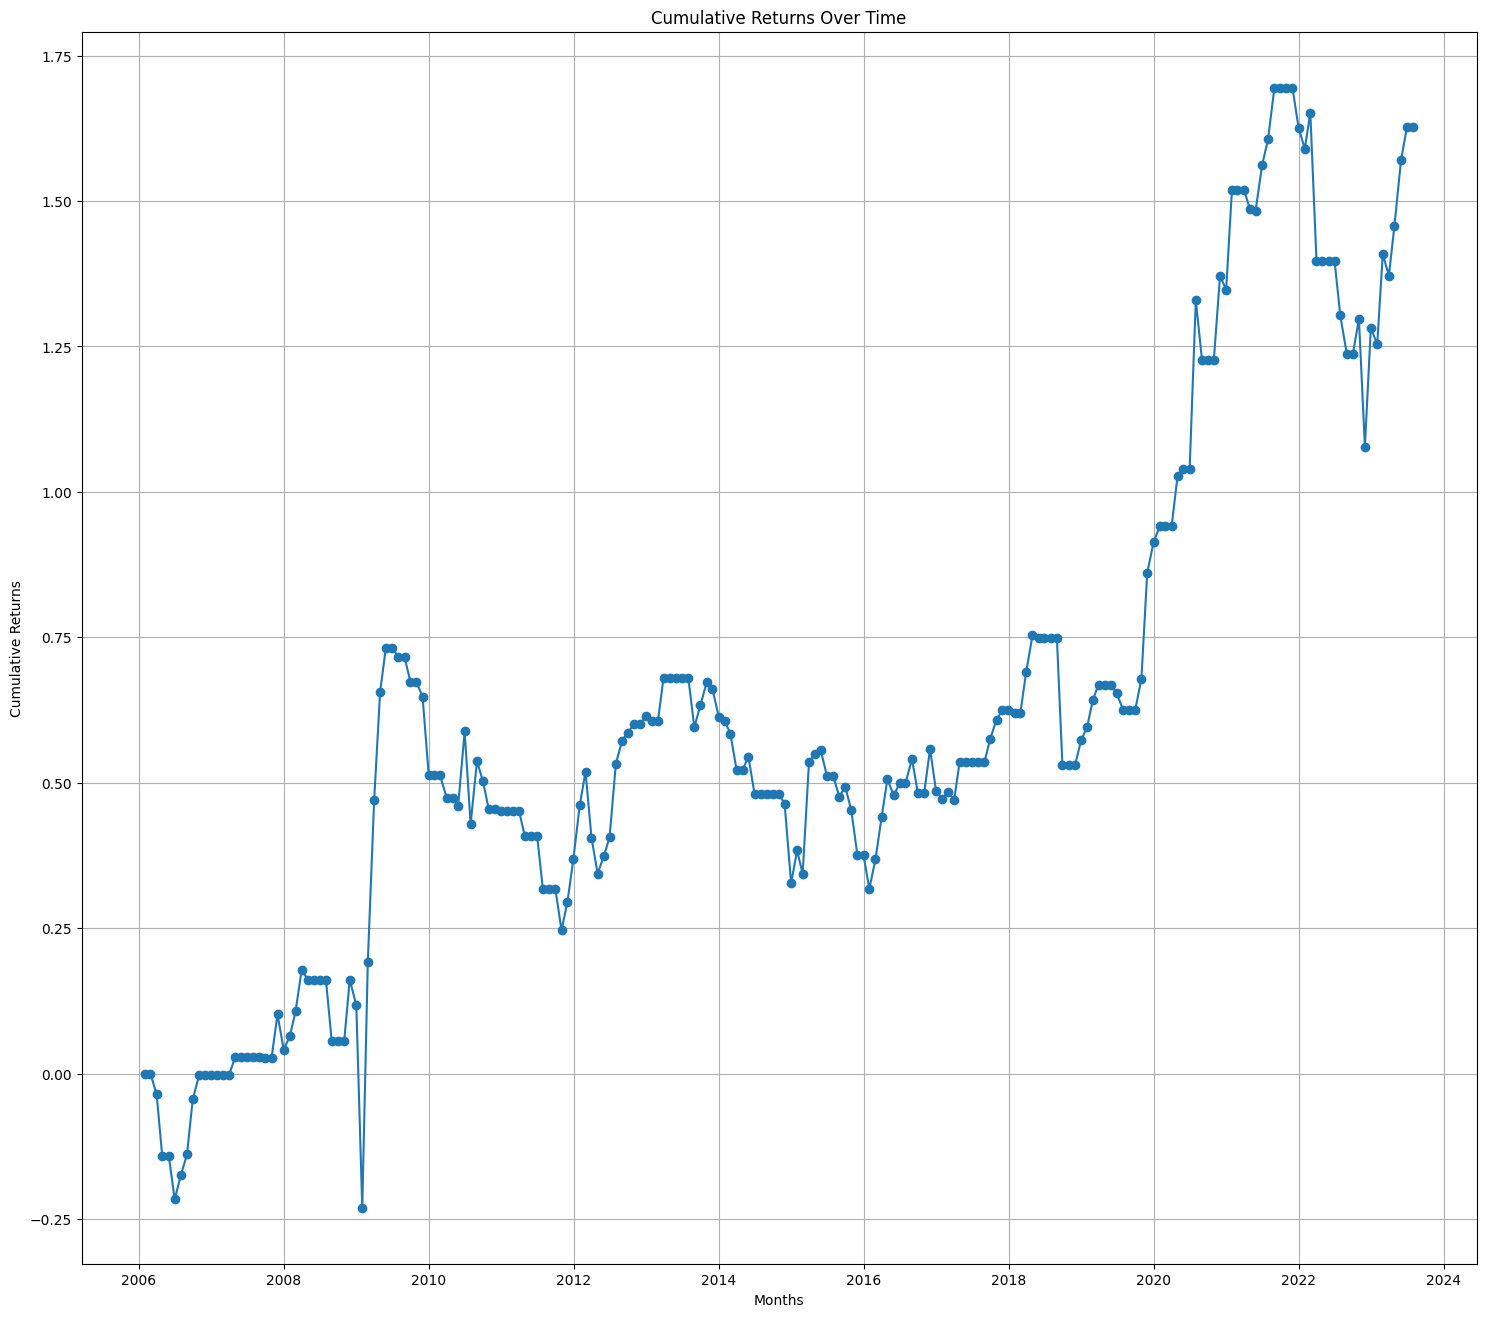

In [8]:
plot_returns(returns=returns)